In [41]:
from cv2 import imread
from pyFusion.iqa import metrics
from pyFusion.iqa import xideasPetrovic as xp
from numpy import mean, zeros, transpose, min, max

import matplotlib.pyplot as plt

In [50]:
def normalize_data(data):
    return (data - min(data)) / (max(data) - min(data))

def mean_MSE(im0, im1, fused_image):
    mse0 = metrics.mean_squared_error(im0, fused_image) 
    mse1 = metrics.mean_squared_error(im1, fused_image) 
    mean_mse = (mse0 + mse1) / 2
    return mean_mse

def mean_EN(im0, im1, fused_image):
    en0 = metrics.entropy_2d(fused_image, im0)
    en1 = metrics.entropy_2d(fused_image, im1)
    mean_entropy = (en0 + en1) / 2
    return mean_entropy

def mean_MI(im0, im1, fused_image):
    mi0 = metrics.mutual_information_2d(fused_image, im0)
    mi1 = metrics.mutual_information_2d(fused_image, im1)

    mean_mi = (mi0 + mi1)
    return mean_mi

def mean_SSIM(im0, im1, fused_image):
    ssim0 = metrics.ssim(im0, fused_image, True)
    ssim1 = metrics.ssim(im1, fused_image, True)
    mean_ssim = (ssim0 + ssim1) / 2
    return mean_ssim


def metrics_result_vect(im0, im1, fused_image):
    Q = xp.InformationPreservation(im0, im1, fused_image).calculate()
    Q = mean(Q)
    G = xp.TotalFusionGain(im0, im1, fused_image).calculate()
    G = mean(G)
    L, N = xp.FusionLossArtifact(im0, im1, fused_image).calculate()
    L = mean(L)
    N = mean(N)
    MSE = mean_MSE(im0, im1, fused_image)
    EN = mean_EN(im0, im1, fused_image)
    MI = mean_MI(im0, im1, fused_image)
    SSIM = mean_SSIM(im0, im1, fused_image)
    return [Q, L, G, N, MSE, EN, MI, SSIM]
    


In [4]:
# Read images

images = ['images/MRI-SPECT/mr.png', 'images/MRI-SPECT/tc.png', 'lvl/fused_lvl']

im1 = imread(images[0])
im0 = imread(images[1])

In [ ]:
#plt.imshow(im1)
#plt.imshow(im0)

In [24]:
iqa_per_lvl = zeros([10,8])
x_axis = zeros(10)

for i in range(10):
    x_axis[i] = i+1
    fused_image = imread(images[2]+str(i+1)+'.png')
    iqa_per_lvl[i, :] = metrics_result_vect(im0, im1, fused_image)

In [47]:
iqa_per_lvl_T = transpose(iqa_per_lvl)
#


(8, 10)

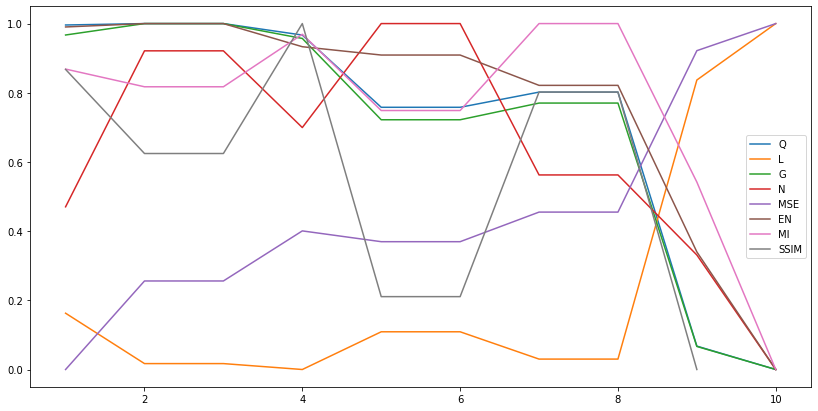

In [56]:
label_vect = ['Q', 'L', 'G', 'N', 'MSE', 'EN', 'MI', 'SSIM']
plt.figure(figsize=(14,7))

for i in range(8):
    iqa_per_lvl_T[i,:] = normalize_data(iqa_per_lvl_T[i,:])
    plt.plot(x_axis, iqa_per_lvl_T[i,:], label = label_vect[i])
plt.legend()

In [ ]:
f = fused_image.ravel()
x = im0.ravel()
y = im1.ravel()

#0.2221162331371818

In [ ]:
kmi = metrics.kvalveth_MI(x, f) + metrics.kvalveth_MI(y, f)
kmi